# Evaluarea pentru examenul **Inteligența Artificială** 

* Lucrarea este pentru studenții grupei 2I, anul de studii 2024-2025.

* Realizați fiecare întrebare și testați codurile care le-ați elaborat.

* Semnați lucrarea prin includerea numelui și prenumelui dvs  și adăugați înaintea prinei întrebări un bloc în care vă prezentați.

***Succese în realizarea lucrării de examen!***

Timp de realizare (***fără ChatGPT&Other***) 3h!

### Întrebarea 1: Analiza exploratorie a datelor

Încărcați datele din fișierul `HR_Employee_Attrition.csv` folosind biblioteca `pandas`. După încărcare, realizați următoarele:

1. Afișați numărul total de rânduri și coloane.

2. Enumerați toate coloanele din dataset și tipurile lor de date.

3. Verificați dacă există valori lipsă și calculați numărul de valori lipsă pentru fiecare coloană.

4. Examinați distribuția valorilor din coloana **Attrition** (variabila țintă) și prezentați rezultatele sub formă de grafic.

Fișierul a fost încărcat cu succes!

1. Numărul total de rânduri și coloane:
Rânduri: 1470, Coloane: 35

2. Coloanele și tipurile lor de date:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating

C:\Users\cazac\AppData\Local\Temp\ipykernel_14544\945239218.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='coolwarm')


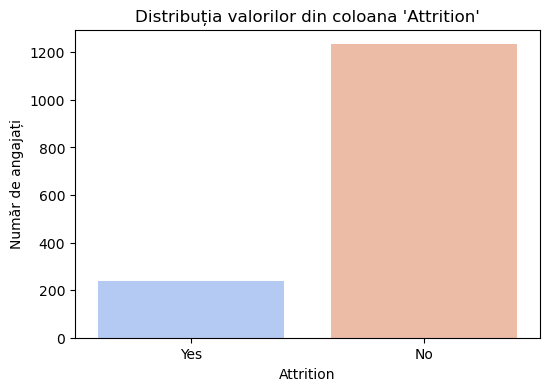

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = os.path.expanduser("~/Downloads/data/HR_Employee_Attrition.csv")

try:
    df = pd.read_csv(file_path)
    print("Fișierul a fost încărcat cu succes!")
except FileNotFoundError:
    print("Eroare: Fișierul nu a fost găsit. Verificați calea specificată.")
    exit()

print("\n1. Numărul total de rânduri și coloane:")
print(f"Rânduri: {df.shape[0]}, Coloane: {df.shape[1]}")

print("\n2. Coloanele și tipurile lor de date:")
print(df.dtypes)

print("\n3. Numărul de valori lipsă pentru fiecare coloană:")
missing_values = df.isnull().sum()
print(missing_values)

print("\n4. Distribuția valorilor din coloana 'Attrition':")
print(df['Attrition'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='coolwarm')
plt.title("Distribuția valorilor din coloana 'Attrition'")
plt.xlabel("Attrition")
plt.ylabel("Număr de angajați")
plt.show()


### Întrebarea 2: Preprocesarea datelor
    
1. Examinați variabilele de tip **object** (`BusinessTravel`, `Department`, `EducationField`, etc.) și realizați o conversie adecvată în variabile numerice folosind:
* `Label Encoding` pentru coloanele cu puține categorii (ex.: *Gender*).
* `One-Hot Encoding` pentru coloanele cu mai multe categorii (ex.: *JobRole*).
2. Normalizați variabilele numerice (de exemplu: *Age*, *MonthlyIncome*) folosind **MinMaxScaler** astfel încât valorile să fie între 0 și 1.


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_columns = ['Gender']
label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

one_hot_columns = ['JobRole', 'Department', 'EducationField', 'BusinessTravel']  # Exemple de coloane cu multe categorii
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)  # drop_first=True pentru a evita colini redundante

numeric_columns = ['Age', 'MonthlyIncome']
scaler = MinMaxScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDatele preprocesate (primele 5 rânduri):")
print(df.head())



Datele preprocesate (primele 5 rânduri):
        Age Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.547619       Yes       1102                 1          2              1   
1  0.738095        No        279                 8          1              1   
2  0.452381       Yes       1373                 2          2              1   
3  0.357143        No       1392                 3          4              1   
4  0.214286        No        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               2                        3       1          61  ...   
2               4                        4       1          92  ...   
3               5                        4       0          56  ...   
4               7                        1       1          40  ...   

   JobRole_Sales Representative  Department_Resear

### Întrebarea 3: Crearea subseturilor de date

1. Filtrați angajații cu **Attrition = "Yes"** și calculați următoarele statistici descriptive:
* Media și deviația standard pentru variabilele *Age*, *MonthlyIncome* și *YearsAtCompany*.
2. Creați un subset cu angajații care au **OverTime = "Yes"** și **WorkLifeBalance = 1**. Analizați distribuția variabilei *Attrition* în acest subset.

### Întrebarea 4: Corelații și relații între variabile

1. Calculați matricea de corelație pentru toate coloanele numerice.
* Identificați variabilele care au cea mai mare corelație pozitivă și negativă cu *Attrition*.
2. Realizați un boxplot pentru variabila `MonthlyIncome` în funcție de `Attrition` (`Yes` și `No`). Ce observați?

### Întrebarea 5: Construirea unui model SVM

1. Pregătiți datele pentru modelare:

* **Variabile independente**: toate coloanele numerice și variabilele encodate.
* **Variabila țintă**: `Attrition` (convertește valorile în 0 și 1: **Yes = 1**, **No = 0**).
2. Împărțiți datele în **seturi de antrenare** și **testare** (80%-20%).
3. Antrenați un **Support Vector Machine (SVM)** folosind un **kernel liniar**.
* Afișați numărul de suport vectori pentru fiecare clasă.
4. Evaluați performanța modelului pe setul de testare folosind următorii metrici:
* **Acuratețea**
* **Precizia**
* **Recall-ul**
* **F1-Score**

### Întrebarea 6: Compararea kernelurilor pentru SVM
1. Antrenați un model SVM folosind următoarele kerneluri:
* **Liniar**
* **RBF (Radial Basis Function)**
* **Polinomial (grad 3)**
2. Comparați performanțele celor trei modele folosind **acuratețea** și **F1-Score** pe setul de testare.
3. Explicați care kernel a performat cel mai bine și de ce credeți că acesta este cazul.

### Întrebarea 7: Optimizarea modelului SVM
1. Utilizați **GridSearchCV** pentru a optimiza hiperparametrii modelului SVM (de exemplu, `C` și `gamma` pentru kernelul RBF).
2. Afișați hiperparametrii care maximizează performanța pe setul de validare.
3. Re-antrenați modelul cu acești hiperparametri și evaluați performanța pe setul de testare.

### Întrebarea 8: Compararea SVM cu alte modele
1. Antrenați un **arbore de decizie** și un model de regresie logistică pe aceleași date.
2. Comparați performanța acestor modele cu cea a modelului SVM folosind aceleași metrici: **acuratețea**, **precizia**, **recall-ul** și **F1-Score**.
3. Care model este cel mai potrivit pentru datele analizate și de ce?